# 数学(math)-概率论(probatility)-分布(distribution)
+ 概率分布，是指用于表述随机变量取值的概率规律。事件的概率表示了一次试验中某一个结果发生的可能性大小。若要全面了解试验，则必须知道试验的全部可能结果及各种可能结果发生的概率，即随机试验的概率分布。如果试验结果用变量X的取值来表示，则随机试验的概率分布就是随机变量的概率分布，即随机变量的可能取值及取得对应值的概率。根据随机变量所属类型的不同，概率分布取不同的表现形式
+ 分类: 当随机变量为离散变量时，这个函数叫做概率质量函数，当随机变量连续时，对应的函数称为概率密度函数 

In [119]:
import numpy as np
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d 
from matplotlib import cm
import math
import seaborn as sns
from scipy import stats
plt.rc('font', family='SimHei', size=13)
mpl.rcParams['axes.unicode_minus']=False
plt.rcParams['font.sans-serif'] = [u'SimHei']

### [伯努利分布](https://zh.wikipedia.org/zh-hans/%E4%BC%AF%E5%8A%AA%E5%88%A9%E5%88%86%E5%B8%83)
+ 描述[1]
    + 离散分布
    + 又名两点分布或者0-1分布，是一个离散型概率分布，为纪念瑞士科学家雅各布·伯努利而命名
    + 伯努利分布指的是对于随机变量X有, 参数为p，如果它分别以概率p和1-p取1和0为值。
+ 概率密度函数:
    + $\operatorname{P}(X=1)=p, \operatorname{P}(X=0)=1-p, 0<p<1$
+ 期望: 
    + ${\displaystyle \operatorname {E} [X]=\sum _{i=0}^{1}x_{i}f_{X}(x)=0+p=p}$
+ 方差: 
    + ${\displaystyle \operatorname {var} [X]=\sum _{i=0}^{1}(x_{i}-E[X])^{2}f_{X}(x)=(0-p)^{2}(1-p)+(1-p)^{2}p=p(1-p)=pq}$
+ 性质
    + pass

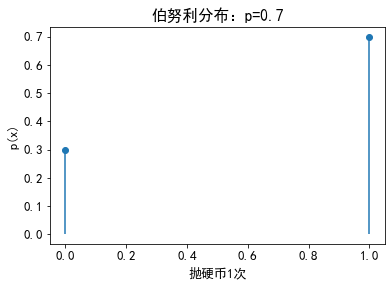

In [120]:
# 抛硬币实验，0为负，1为正
x = np.arange(0, 2, 1) # 在 [0,1] 之间
p = 0.7 # 选0 的概率 是0.5， 选1的概率是0.5
p_list = stats.bernoulli.pmf(x, p)
# 绘图
plt.plot(x, p_list, marker='o', linestyle='None')
plt.vlines(x, ymin=0, ymax=p_list)
plt.xlabel('抛硬币1次')
plt.ylabel('p(x)')
plt.title('伯努利分布：p=' + str(p))
plt.show()

### [二项分布](https://zh.wikipedia.org/wiki/%E4%BA%8C%E9%A0%85%E5%BC%8F%E5%88%86%E5%B8%83)
+ 描述
    + 离散分布
    + 某事件发生的概率为p，独立重复N次实验，该事件发生次数X 的概率分布是二项分布, 记为 $ X \thicksim B(n,p) $ 
+ 概率密度函数：
    + $ P(X=k)=C_n^k p^k (1-p)^{n-k} $
+ 期望
    + $E[X]=np$
+ 方差
    + $Var[X]=np(1-p)$

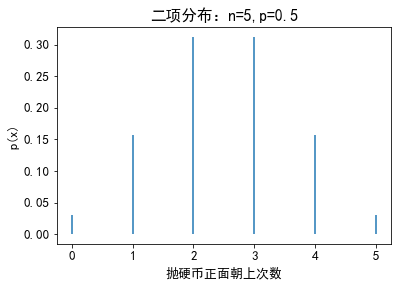

In [121]:
# 进行五次抛硬币实验
n = 5
p = 0.5
x = np.arange(0, n+1, 1)
# 绘图
p_list = stats.binom.pmf(x, n, p)
plt.vlines(x, ymin=0, ymax=p_list)
plt.xlabel('抛硬币正面朝上次数')
plt.ylabel('p(x)')
plt.title('二项分布：n=' + str(n) + ',p=' + str(p))
plt.show()


### 多项分布
+ 描述
    + 离散分布
    + 二项分布的试验结果只有两个(成功和失败)，而多项分布的试验结果则多于两个。如果试验的结果有三个，则是三项分布；如果结果有六个，则是六项分布
    + 现实生活中也有很多符合多项分布的例子：例如，扔骰子，结果点数有六种可能(骰子有6个面对应6个不同的点数)；足球比赛的结果有胜、平、负三种
+ 概率密度函数
    + 试验可能产生的结果有k种${a_1, a_2,..., a_k}$，每种结果可能发生的概率为$p_1, p_2,..., p_k$, 现进行n次多项分布试验，假设$a_1$ 出现的次数为$x_1$次， $a_k$ 出现的次数为 $x_k$次，那么联合概率分布如下
        + $P\left(X_{1}=x_{1}, X_{2}=x_{2}, \ldots, X_{k}=x_{k}\right)=\frac{n !}{x_{1} ! x_{2} ! \cdots x_{k} !} p_{1}^{x_{1}} p_{2}^{x_{2}} \cdots p_{k}^{x_{k}}$
+ 期望
    + 多项式分布每一个结果都有均值, $E(x_i)=np_i$
+ 方差
    + 多项式分布每一个结果都有方差, $Var(x_i)=np_i(1-p_i)$
+ 例子
    + 假设萤火虫对食物的喜欢程序，我们给三种选择：花粉，蚜虫，面团。假设20%的萤火虫喜欢花粉，35%的萤火虫喜欢蚜虫，45%的萤火虫喜欢面团。
    + 对30只萤火虫做实验，发现8只喜欢花粉，10只喜欢蚜虫，12只喜欢面团，这件事的概率为： $P\left(N_{1}=8, N_{2}=10, N_{3}=12\right)=\frac{30 !}{8 ! 10 ! 12 !} 0.2^{8} 0.35^{10} 0.45^{12}$

In [122]:
# 投掷骰子 
# https://doc.codingdict.com/NumPy_v111/reference/generated/numpy.random.multinomial.html
# 20 次
print(np.random.multinomial(20, [1/6.]*6, size=1))
# 投掷20次，再投掷20次
print(np.random.multinomial(20, [1/6.]*6, size=2))

[[3 1 5 6 2 3]]
[[2 3 5 2 5 3]
 [3 3 2 3 6 3]]


### [几何分布](https://zh.wikipedia.org/wiki/%E5%B9%BE%E4%BD%95%E5%88%86%E4%BD%88)
+ 描述：
    + 离散分布
    + 在重复多次的伯努利试验中，试验进行到某种结果出现第一次为止，此时的试验总次数服从几何分布, 记为 $X \sim G(p)$
    + 比如，假设不停地掷骰子，直到得到1。投掷次数是随机分布的，取值范围是无穷集合{ 1, 2, 3, ... }，并且是一个p = 1/6的几何分布
+ 概率密度函数
    + 如果每次试验的成功概率是p，那么k次试验中，第k次才得到成功的概率是
        + $\operatorname{Pr}(X=k)=(1-p)^{k-1} p$, k=1,2,3
+ 期望
    + $E(x) = \frac{1}{p}$
+ 方差
    + $Var(x) = \frac{1-p}{p^2}$

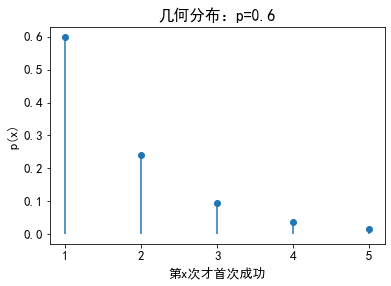

In [123]:
# 第k次才实验成功的概率
k = 5
p = 0.6
x = np.arange(1, k+1, 1)
p_list = stats.geom.pmf(x, p)
# 绘图
plt.plot(x, p_list, marker='o', linestyle='None')
plt.vlines(x, ymin=0, ymax=p_list)
plt.xlabel('第x次才首次成功')
plt.ylabel('p(x)')
plt.title('几何分布：p=' + str(p))
plt.show()

### [泊松分布](https://zh.wikipedia.org/wiki/%E5%8D%9C%E7%93%A6%E6%9D%BE%E5%88%86%E5%B8%83)
+ 描述
    + 离散分布
    + 泊松分布可以用来表示独立随机事件发生的次数, 泊松分布的参数λ是单位时间（或单位面积）内随机事件的平均发生率, 记为 $X \sim \pi(\lambda)$, 或记为 $X \sim \operatorname{Pois}(\lambda)$.
    + 例如 某个公交站台一个小时内出现了的公交车的数量 就用泊松分布来表示
+ 概率密度函数
    + $P(X=k)=\frac{e^{-\lambda} \lambda^{k}}{k !}$
+ 期望
    + $E(X) = \lambda $
+ 方差
    + $Var(X) = \lambda $

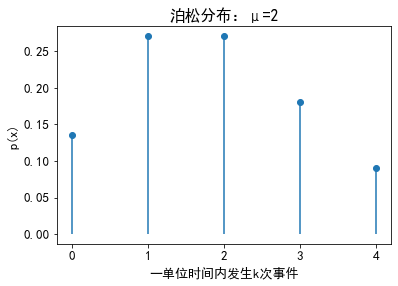

In [124]:
# 每天发生2次事故, 计算 发生 0，1，2，3，4 次的概率
mu = 2 # 平均值：每天发生2次事故
k = 4
x = np.arange(0, k+1, 1) # 发生 0,1,2,3,4 次事故的概率
# 绘图
p_list = stats.poisson.pmf(x, mu)
plt.plot(x, p_list, marker='o', linestyle='None')
plt.vlines(x, 0, p_list)
plt.xlabel('一单位时间内发生k次事件')
plt.ylabel('p(x)')
plt.title('泊松分布：μ='+ str(mu))
plt.show()

### [指数分布](https://zh.wikipedia.org/zh-hans/%E6%8C%87%E6%95%B0%E5%88%86%E5%B8%83)
+ 描述
    + 连续分布
    + 表示独立随机事件发生的**时间间隔**
    + 记作 $X \sim \operatorname{Exp}(\lambda)$， 其中λ > 0是分布的参数，即每单位时间发生该事件的次数
    + 比如旅客进入机场的时间间隔、电话打进客服中心的时间间隔、中文维基百科新条目出现的时间间隔、机器的寿命等
    + **指数分布即形状参数α为1的伽玛分布**
+ 概率密度函数
    + $f(x ; \lambda)=\left\{\begin{array}{cc}\lambda e^{-\lambda x} & x \geq 0 \\ 0 & , x<0\end{array}\right.$
+ 累积分布函数
    + $F(x ; \lambda)=\left\{\begin{array}{cl}1-e^{-\lambda:} & , x \geq 0 \\ 0 & , x<0\end{array}\right.$
+ 期望
    + $E(X)=\frac{1}{\lambda}$
+ 方差
    + $Var(X)=\frac{1}{\lambda^2}$
+ 其他参考
    + 指数分布公式的含义是什么？ - 马同学的回答 - 知乎 https://www.zhihu.com/question/24796044/answer/673838656

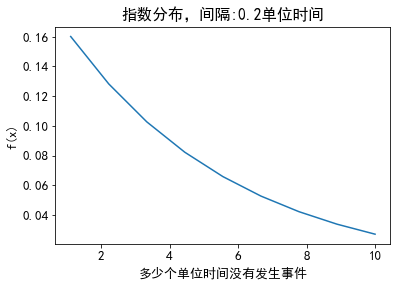

In [125]:
# 两个事件之间的发生间隔为1/5单位时间
# 时间间隔越长，概率越低
r = 1/5
X = []
Y = []
for x in np.linspace(0, 10, 10):
    if x==0:
        continue
 #   p = r*math.e**(-r*x)  #直接用公式算
    p = stats.expon.pdf(x, scale=1/r)  #用scipy.stats.expon工具算,注意这里scale参数是标准差
    X.append(x)
    Y.append(p)
plt.plot(X,Y)
plt.xlabel("多少个单位时间没有发生事件")
plt.ylabel("f(x)")
plt.title("指数分布，间隔:" + str(r) + '单位时间')
plt.show()
# 下图中 1个单位时间未发生时间的概率约为 0.15
# 下图中 10个单位时间未发生时间的概率小于 0.04

### [$\Gamma$ 分布](https://zh.wikipedia.org/zh-hans/%E4%BC%BD%E7%8E%9B%E5%88%86%E5%B8%83)
+ 描述
    + 连续分布
    + 假设X1, X2, ... Xn 为连续发生事件的等候时间，且这n次等候时间为独立的，那么这n次等候时间之和Y (Y=X1+X2+...+Xn)服从伽玛分布，即 Y~Gamma(α , β), 其中α = n, β = λ， λ 表单位时间内事件的发生率(单位时间发生的次数)
    + **指数分布是伽玛分布α = 1的特殊情况**
+ 概率密度函数
    + $f(x)=\frac{x^{(\alpha-1)} \lambda^{\alpha} e^{(-\lambda x)}}{\Gamma(\alpha)}$
+ 性质
    + $\begin{cases}\Gamma(\alpha)=(\alpha-1) ! & \text { if } \alpha \text { is } \mathbb{Z}^{+} \\ \Gamma(\alpha)=(\alpha-1) \Gamma(\alpha-1) & \text { if } \alpha \text { is } \mathbb{R}^{+} \\ \Gamma\left(\frac{1}{2}\right)=\sqrt{\pi}\end{cases}$
+ 期望
    + $E(X)=\alpha\beta$
+ 方差
    + $Var(X)=\alpha\beta^2$
+ 其他
    + $\Gamma$ 函数 与 $\Gamma$ 分布 https://cosx.org/2013/01/lda-math-gamma-function

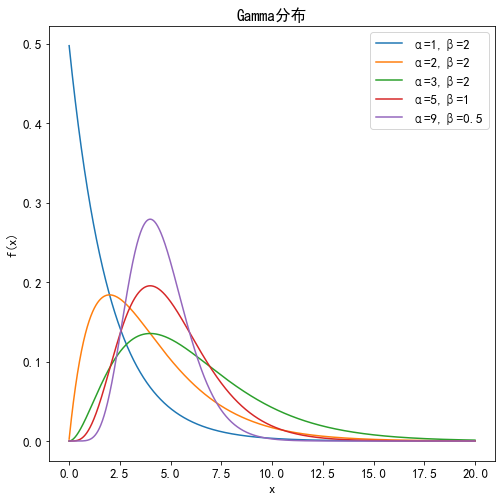

In [126]:
import scipy.stats as st
import seaborn as sns

# 设置画布
fig = plt.figure(figsize=(8, 8))  # 确定绘图区域尺寸
ax1 = fig.add_subplot(1, 1, 1)
x = np.arange(0.01, 20, 0.01) 

# 绘制gamma分布曲线
y1 = st.gamma.pdf(x, 1, scale=2)  # "α=1,β=2"
y2 = st.gamma.pdf(x, 2, scale=2)  # "α=2,β=2"
y3 = st.gamma.pdf(x, 3, scale=2)  # "α=3,β=2"
y4 = st.gamma.pdf(x, 5, scale=1)  # "α=5,β=1"
y5 = st.gamma.pdf(x, 9, scale=0.5)  # "α=9,β=0.5"

# 设置图例
ax1.plot(x, y1, label="α=1,β=2")
ax1.plot(x, y2, label="α=2,β=2")
ax1.plot(x, y3, label="α=3,β=2")
ax1.plot(x, y4, label="α=5,β=1")
ax1.plot(x, y5, label="α=9,β=0.5")

# 设置坐标轴标题
ax1.set_xlabel('x')
ax1.set_ylabel('f(x)')
ax1.set_title("Gamma分布")
ax1.legend(loc="best")

plt.show()

### [Beta 分布](https://zh.wikipedia.org/wiki/%CE%92%E5%88%86%E5%B8%83)
+ 性质
    + Beta分布是一组定义在区间\[0, 1\]的连续概率分布，有两个参数α和β，且α，β>0
    + 记作 $X \sim \operatorname{B}(\alpha, \beta)$
    
+ 概率密度函数为
    + $ \begin{aligned} B(x ; \alpha, \beta) = f(x ; \alpha, \beta) &=\frac{x^{\alpha-1}(1-x)^{\beta-1}}{\int_{0}^{1} u^{\alpha-1}(1-u)^{\beta-1} d u} \\ &=\frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha) \Gamma(\beta)} x^{\alpha-1}(1-x)^{\beta-1} \\ &=\frac{1}{\mathrm{~B}(\alpha, \beta)} x^{\alpha-1}(1-x)^{\beta-1} \end{aligned}$
    + $B(\alpha, \beta)$ 是一个标准化函数，它只是为了使得这个分布的概率密度积分等于1才加上的
+ 累积分布函数
    + $F(x ; \alpha, \beta)=\frac{\mathbf{B} (x | \alpha, \beta)}{\mathbf{B}(\alpha, \beta)}$
+ 期望
    + $\mu=\mathrm{E}(X)=\frac{\alpha}{\alpha+\beta}$
+ 方差
    + $\operatorname{Var}(X)=\mathrm{E}(X-\mu)^{2}=\frac{\alpha \beta}{(\alpha+\beta)^{2}(\alpha+\beta+1)}$
+ 参考
    + 如何通俗理解 beta 分布？ - 小杰的回答 - 知乎 https://www.zhihu.com/question/30269898/answer/123261564
    + https://zhuanlan.zhihu.com/p/69606875

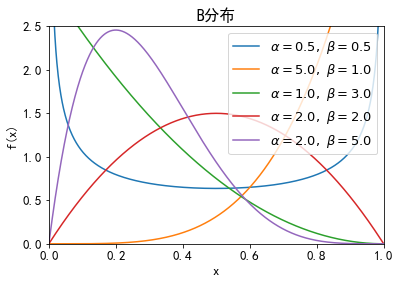

In [127]:
# 定义一组alpha 跟 beta值
alpha_beta_values = [[0.5,0.5], [5, 1], [1,3], [2,2], [2,5]]
linestyles = []

# 定义 x 值
x = np.linspace(0, 1, 1002)[1:-1]
for alpha_beta_value in alpha_beta_values:
  # print(alpha_beta_value)
  dist = stats.beta(alpha_beta_value[0], alpha_beta_value[1])
  dist_y = dist.pdf(x)
  # 添加图例
  # plot.legend('alpha=')
  # 创建 beta 曲线
  plt.plot(x, dist_y, label=r'$\alpha=%.1f,\ \beta=%.1f$' % (alpha_beta_value[0], alpha_beta_value[1]))

# 设置标题
plt.title(u'B分布')
plt.xlabel("x")
plt.ylabel("f(x)")
# 设置 x,y 轴取值范围
plt.xlim(0, 1)
plt.ylim(0, 2.5)
plt.legend()
plt.show()

### [狄雷克雷分布](https://zh.wikipedia.org/wiki/%E7%8B%84%E5%88%A9%E5%85%8B%E9%9B%B7%E5%88%86%E5%B8%83)
+ 描述
    + 连续分布
    + Beta分布外推到k种的一般情形
    + **二项分布的分布是Beta分布，多项分布的分布就是Dirichlet分布**
+ 概率密度函数
    + $f(x)=\frac{1}{\mathrm{~B}(\boldsymbol{\alpha})} \prod_{i=1}^{K} x_{i}^{\alpha_{i}-1}$, 其中 $\mathrm{B}(\boldsymbol{\alpha})=\frac{\prod_{i=1}^{K} \Gamma\left(\alpha_{i}\right)}{\Gamma\left(\sum_{i=1}^{K} \alpha_{i}\right)}$， $\sum_{i=1}^{K} x_{i} \leq 1$
+ 参考
    + https://xijunlee.github.io/2017/09/09/Dirichlet%E5%88%86%E5%B8%83%E4%B8%8EBeta%E5%88%86%E5%B8%83/

In [128]:
from scipy.stats import dirichlet
quantiles = np.array([0.2, 0.2, 0.6])  # 三个原始概率
alpha = np.array([0.4, 5, 15])  # 三个对应的 alpha
dirichlet.pdf(quantiles, alpha)

0.2843831684937255

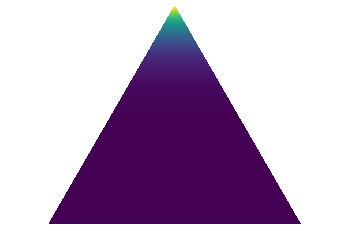

In [129]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri

#生成等边三角形
corners = np.array([[0, 0], [1, 0], [0.5, 0.75**0.5]])
triangle = tri.Triangulation(corners[:, 0], corners[:, 1])

#每条边中点位置
midpoints = [(corners[(i + 1) % 3] + corners[(i + 2) % 3]) / 2.0 for i in range(3)]

def xy2bc(xy, tol=1.e-3):
    #将三角形顶点的笛卡尔坐标映射到重心坐标系
    s = [(corners[i] - midpoints[i]).dot(xy - midpoints[i]) / 0.75 for i in range(3)]
    return np.clip(s, tol, 1.0 - tol)

#有了重心坐标，可以计算Dirichlet概率密度函数的值
class Dirichlet(object):
    
    def __init__(self, alpha):
        from math import gamma
        from operator import mul
        from functools import reduce
        self._alpha = np.array(alpha)
        self._coef = gamma(np.sum(self._alpha)) / reduce(mul, [gamma(a) for a in self._alpha]) #reduce:sequence连续使用function
        
    def pdf(self, x):
        #返回概率密度函数值
        from operator import mul
        from functools import reduce
        return self._coef * reduce(mul, [xx ** (aa - 1) for (xx, aa)in zip(x, self._alpha)])
    
def draw_pdf_contours(dist, nlevels=200, subdiv=8, **kwargs):
    import math
    
    #细分等边三角形网格
    refiner = tri.UniformTriRefiner(triangle)
    trimesh = refiner.refine_triangulation(subdiv=subdiv)
    pvals = [dist.pdf(xy2bc(xy)) for xy in zip(trimesh.x, trimesh.y)]

    plt.tricontourf(trimesh, pvals, nlevels, **kwargs)
    plt.axis('equal')
    plt.xlim(0, 1)
    plt.ylim(0, 0.75**0.5)
    plt.axis('off')
draw_pdf_contours(Dirichlet([1,1,9]))

### [正太分布/高斯分布](https://zh.wikipedia.org/zh/%E6%AD%A3%E6%80%81%E5%88%86%E5%B8%83)
+ 性质
    + 随机变量 X 服从一个期望为 $\mu$， 标准方差为 $\sigma^2$的高斯分布 
    + 记为 $X \sim N\left(\mu, \sigma^{2}\right)$
+ 概率密度函数
    + $f(x)=\frac{1}{\sigma \sqrt{2 \pi}} e^{-\frac{(x-\mu)^{2}}{2 \sigma^{2}}}$
    + $\mu$ = 0, $\sigma$ = 1 的情况为标准正态分布

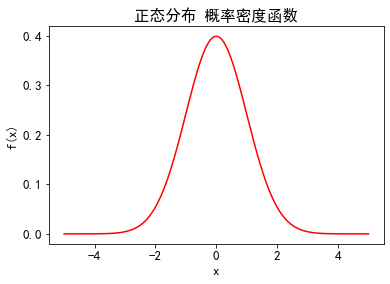

In [130]:
# 一维正太分布
x = np.linspace(-5,5,100000)
y = stats.norm.pdf(x,0,1)
plt.plot(x,y,c="red")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title(u'正态分布 概率密度函数')
plt.show()

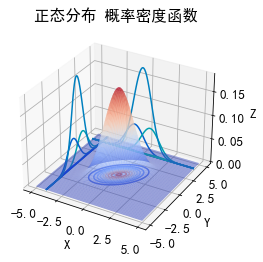

In [131]:
# 二维正太分布
num = 200
l = np.linspace(-5,5,num)
X,Y = np.meshgrid(l,l)

u = np.array([0,0]) #均值
o = np.array([[1,0.5],[0.5,1]])  #协方差矩阵

pos = np.concatenate((np.expand_dims(X,axis=2),np.expand_dims(Y,axis=2)),axis=2)  #定义坐标点

a = np.dot((pos-u),np.linalg.inv(o))  #o的逆矩阵
b = np.expand_dims(pos-u,axis=3)
# Z = np.dot(a.reshape(200*200,2),(pos-u).reshape(200*200,2).T)
Z = np.zeros((num,num),dtype=np.float32)                
for i in range(num):
    Z[i] = [np.dot(a[i,j],b[i,j]) for j in range(num)]                         #计算指数部分

Z = np.exp(Z*(-0.5))/(2*np.pi*math.sqrt(np.linalg.det(o)))

fig = plt.figure()                                                              #绘制图像
ax = fig.add_subplot(111,projection='3d')
ax.plot_surface(X,Y,Z,rstride=2,cstride=2,alpha=0.6,cmap=cm.coolwarm)

cset = ax.contour(X,Y,Z,10,zdir='z',offset=0,cmap=cm.coolwarm)                     #绘制xy面投影
cset = ax.contour(X,Y,Z,zdir = 'x',offset=-4,cmap = mpl.cm.winter)                 #绘制zy面投影
cset = ax.contour(X,Y,Z,zdir = 'y',offset= 4,cmap =mpl.cm.winter)                  #绘制zx面投影

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.title(u'正态分布 概率密度函数')
plt.show()

### [t-分布](https://zh.wikipedia.org/wiki/%E5%8F%B8%E5%BE%92%E9%A0%93t%E5%88%86%E5%B8%83)
+ 描述
    + 设随机变量 $X \sim N(0,1), Y \sim \chi_{n}^{2}$, 且 $X$ 和 $Y$ 独立, 则称$T=\frac{X}{\sqrt{Y / n}}$ 为自由为 $n$ 的 $t$ 变量, 其分布称为由为 $n$ 的 $t$ 分布, 记为 $T \sim t_{n}$
+ 概率密度函数
    + $h(t)=\frac{\Gamma\left(\frac{n+1}{2}\right)}{\sqrt{\pi n} \Gamma\left(\frac{n}{2}\right)}\left(1+\frac{t^{2}}{n}\right)^{-\frac{n+1}{2}},-\infty<t<+\infty$
+ 性质
    + t分布的极限是正太分布

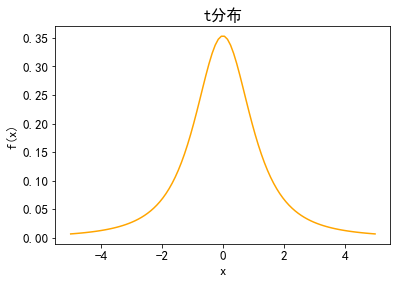

In [132]:
x = np.linspace(-5,5,100)
y = stats.t.pdf(x,2)
plt.plot(x,y,c="orange")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title('t分布')
plt.show()

### [卡方分布](https://zh.wikipedia.org/wiki/%E5%8D%A1%E6%96%B9%E5%88%86%E4%BD%88)
+ 描述
    + 设 $X_{1}, X_{2}, \cdots, X_{n}$ i.i.d. $\sim N(0,1)$, 令 $X=\sum_{i=1}^{n} X_{i}^{2}$, 则称 $X$ 是自由度为 $n$ 的 $\chi^{2}$ 变量, 其分布称为自由度为 $n$ 的 $\chi^{2}$ 分布, 记为 $X \sim \chi_{n}^{2}$.
+ 概率密度函数
    + $f(u)=\frac{1}{\Gamma\left(\frac{v}{2}\right) 2^{\frac{v}{2}}} u^{\frac{\nu}{2}-1} e^{-\frac{u}{2}}, 0 \leq u<\infty$
+ 性质
    + 设随机变量 $X \sim \chi_{n}^{2}$ 则有 $E(X)=n, \operatorname{Var}(X)=$ $2 n$.
    + 设 $Z_{1} \sim \chi_{n_{1}}^{2}, Z_{2} \sim \chi_{n_{2}}^{2}$, 且 $Z_{1}$ 和 $Z_{2}$ 独立, 则 $Z_{1}+Z_{2} \sim \chi_{n_{1}+n_{2}}^{2}$

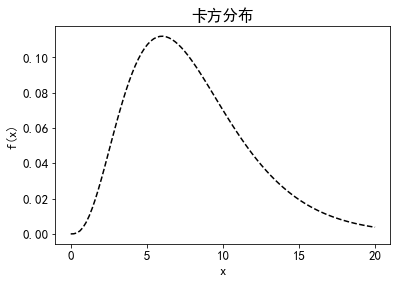

In [133]:
x = np.linspace(0,20, 100)
plt.plot(x, stats.chi2.pdf(x, df=8), 'k--', label='df8') # df 为自由度
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title('卡方分布')
plt.show()

### F 分布
+ 描述
    + 设随机变量 $X \sim \chi_{m}^{2}, Y \sim \chi_{n}^{2}$, 且 $X$ 和 $Y$ 独立, 则称$F=\frac{X / m}{Y / n}$ 为自由度分别是 $m$ 和 $n$ 的 $F$ 变量, 其分布称为自由度分 别是 $m$ 和 $n$ 的 $F$ 分布, 记为 $F \sim F_{m, n}$
+ 概率密度函数
    + $f_{m, n}(x)= \begin{cases}\frac{\Gamma\left(\frac{m+n}{2}\right)}{\Gamma\left(\frac{n}{2}\right) \Gamma\left(\frac{m}{2}\right)} m^{\frac{m}{2}} n^{\frac{n}{2}} x^{\frac{m}{2}-1}(n+m x)^{-\frac{m+n}{2}}, & x>0, \\ 0, & \text { other }\end{cases}$
+ 性质
    + 若 $Z \sim F_{m, n}$, 则 $1 / Z \sim F_{n, m}$
    + 若 $T \sim t_{n}$, 则 $T^{2} \sim F_{1, n}$
    + $F_{m, n}(1-\alpha)=1 / F_{n, m}(\alpha)$

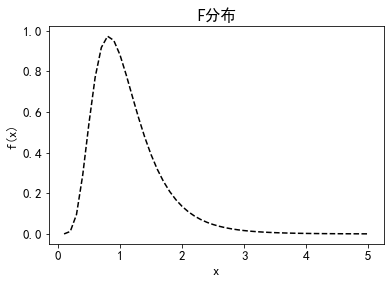

In [134]:
# F 分布
lst = []
cnt = 0
for i in range(50):
    cnt = round(cnt + 0.1, 2)
    lst.append(cnt)
x = lst
plt.plot(x, stats.f.pdf(x, 20, 20 ), "k--", label='y=f(x, 20, 20)')
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title('F分布')
plt.show()

# Reference
[1] Sheldon M Ross. 《Introduction to probability and statistics for engineers and scientists》. Academic Press. 2009: 第141页. ISBN 9780123704832. 

[2] 三大抽样分布：卡方分布，t分布和F分布的简单理解 https://blog.csdn.net/anshuai_aw1/article/details/82735201

[3] python 实现抽样分布（T分布、F分布、卡方分布）https://blog.csdn.net/qq_39284106/article/details/103540470